In [16]:
import torch
from network_parser import parse
import cnns
import global_v as glv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dtype = torch.float32

config_path = 'Config_files/XOR.yaml'
checkpoint_path = 'checkpoint/ckpt.pth'
params = parse(config_path)
glv.init(params)

net = cnns.Network(params['Network'], params['Layers'],\
            torch.tensor([2]).to(glv.device))
                   
checkpoint = torch.load(checkpoint_path)
net.load_state_dict(checkpoint['net'])
resolution = 0.05
outputs_size = len(np.arange(-1,1,resolution))
outputs = np.zeros((outputs_size,outputs_size))
for index_i, i in enumerate(np.arange(-1,1,resolution)):
    
    print(index_i/outputs_size*100,'%')
    for index_j, j in enumerate(np.arange(-1,1,resolution)):
        inputs = torch.tensor([i,j])
        inputs = inputs.unsqueeze_(-1).repeat(1, 1, 1, 1, glv.n_steps)
        outputs[index_i,index_j] = torch.sum(net.forward(inputs, False))/glv.n_steps


Network Structure:
torch.Size([64])
linear
FC_1
input shape: [10, 2, 1, 1, 50]
weight shape:  [2, 64]
output shape: [10, 64, 1, 1, 50]
-----------------------------------------
torch.Size([128])
linear
FC_2
input shape: [10, 64, 1, 1, 50]
weight shape:  [64, 128]
output shape: [10, 128, 1, 1, 50]
-----------------------------------------
torch.Size([256])
linear
FC_3
input shape: [10, 128, 1, 1, 50]
weight shape:  [128, 256]
output shape: [10, 256, 1, 1, 50]
-----------------------------------------
-----------------------------------------
0.0 %
2.5 %
5.0 %
7.5 %
10.0 %
12.5 %
15.0 %
17.5 %
20.0 %
22.5 %
25.0 %
27.500000000000004 %
30.0 %
32.5 %
35.0 %
37.5 %
40.0 %
42.5 %
45.0 %
47.5 %
50.0 %
52.5 %
55.00000000000001 %
57.49999999999999 %
60.0 %
62.5 %
65.0 %
67.5 %
70.0 %
72.5 %
75.0 %
77.5 %
80.0 %
82.5 %
85.0 %
87.5 %
90.0 %
92.5 %
95.0 %
97.5 %


In [25]:
checkpoint = torch.load(checkpoint_path)
print(1/checkpoint['net']['my_parameters.8'])

tensor([[[[4.4210e+00]],

         [[4.4033e+00]],

         [[4.3084e+01]],

         [[7.6209e+00]],

         [[5.8633e+00]],

         [[9.6861e+02]],

         [[4.5859e+00]],

         [[1.5945e+03]],

         [[4.6975e+00]],

         [[1.7136e+02]],

         [[4.6363e+00]],

         [[8.3740e+00]],

         [[5.3493e+00]],

         [[1.7985e+01]],

         [[4.4020e+00]],

         [[4.3843e+00]],

         [[3.8860e+00]],

         [[1.7398e+01]],

         [[3.9288e+00]],

         [[5.7319e+00]],

         [[4.4187e+00]],

         [[1.2505e+01]],

         [[4.8507e+00]],

         [[4.3245e+00]],

         [[7.6160e+00]],

         [[3.5365e+02]],

         [[9.8880e+00]],

         [[3.4821e+00]],

         [[8.9787e+00]],

         [[2.0413e+01]],

         [[2.5392e+01]],

         [[1.0705e+02]],

         [[3.3126e+03]],

         [[8.3386e+00]],

         [[3.9931e+03]],

         [[1.0345e+01]],

         [[4.1343e+00]],

         [[4.5111e+00]],

         [[7

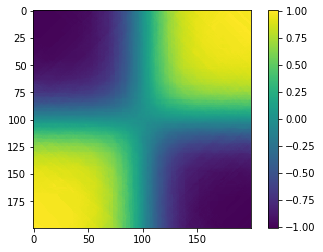

In [83]:
plt.imshow(outputs)
plt.colorbar()

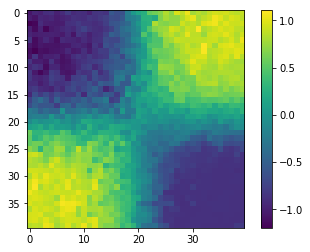

In [17]:
plt.imshow(outputs)
plt.colorbar()

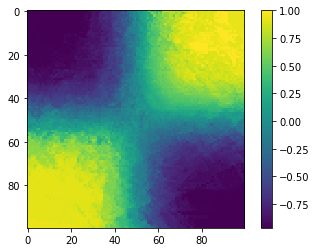

In [9]:
plt.imshow(np.clip(outputs,-1,1))
plt.colorbar()

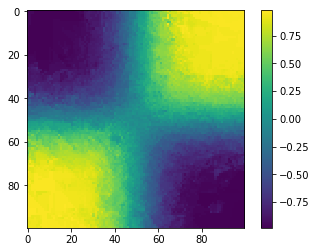

In [15]:
plt.imshow(outputs)
plt.colorbar()

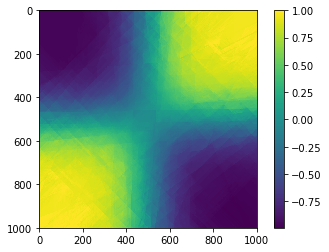

In [46]:
plt.imshow(np.clip(outputs,-1,1))
plt.colorbar()

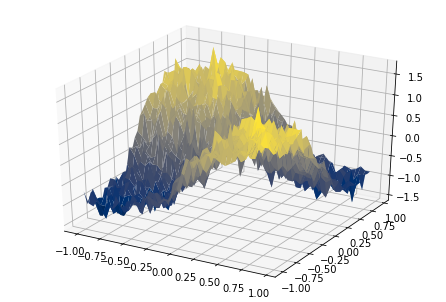

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
ax = Axes3D(figure)

X = np.arange(-1,1,resolution)
Y = np.arange(-1,1,resolution)
X,Y = np.meshgrid(X,Y)

ax.plot_surface(X,Y,outputs,cmap='cividis')

In [41]:
print(net.parameters)
print(list(net.parameters())[4].detach().numpy().shape)

<bound method Module.parameters of Network(
  (my_parameters): ParameterList(
      (0): Parameter containing: [torch.FloatTensor of size 40x2]
      (1): Parameter containing: [torch.FloatTensor of size 20x40]
      (2): Parameter containing: [torch.FloatTensor of size 10x20]
      (3): Parameter containing: [torch.FloatTensor of size 10x10]
      (4): Parameter containing: [torch.FloatTensor of size ]
      (5): Parameter containing: [torch.FloatTensor of size ]
  )
)>
(10, 20)


In [39]:
40, 2
20, 40
10, 20,


SyntaxError: invalid syntax (<ipython-input-39-922c171f500b>, line 1)